# Wavepal vs Torrence-Compo-based approach + Signif. testing against red noise (params estimated with carma pack)

In [1]:
% matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
import wavepal as wv
import os

In [2]:
mypath="../../figures/comparaison_wavepal_vs_classique_regularly_sampled/"

In [3]:
data=np.genfromtxt("data_NINO3/NINO3_anomalies.txt")
t=np.zeros(data.shape[0]*12)
y=np.zeros(data.shape[0]*12)
print t.size
count=0
for k in range(data.shape[0]):
    for l in range(12):
        count+=1
        t[k*12+l]=float(count)
        y[k*12+l]=data[k,l+1]

1764


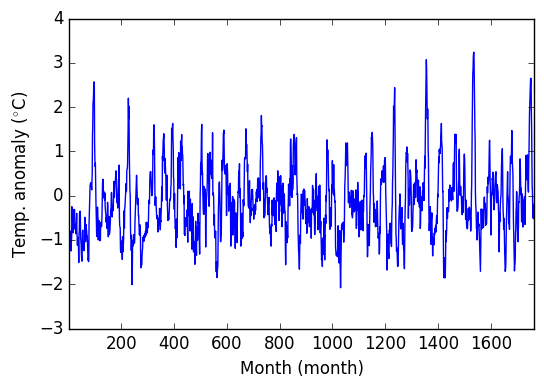

In [4]:
plt.plot(t,y)
plt.xlabel("Month (month)",fontsize=12)
plt.ylabel("Temp. anomaly (${}^{\circ}$C)",fontsize=12)
plt.xlim(t[1],t[-1])
plt.tick_params(labelsize=12)
plt.show()

In [5]:
w0=15.

In [6]:
x=wv.Wavepal(t,y,t_axis_label="Month", t_units="month", mydata_axis_label="Temp. anomaly", mydata_units="${}^{\circ}$C")
x.check_data()
x.choose_trend_degree(-1)
x.trend_vectors()

In [7]:
x.carma_params(signif_level_type="a")
sig_wn=x.sigwn_unique
alpha_rn=x.alpha_unique

****************************
*        CARMA PACK        *
****************************

FIRST ROUND (to estimate the number of independent samples): with  10000  samples
**********************************************************************************************************
Calculating sigma...
Calculating log-likelihoods...
Decorrelation length (in number of samples) - Estimation:  13

SECOND ROUND: generates  13000  samples
***************************************
Calculating sigma...
Calculating log-likelihoods...
Decorrelation length (in number of samples):  14
**************************************
*        BUILD CARMA MATRIX K        *
**************************************
Computing the median parameters of the CAR-1 process from  929  MCMC samples.
Median parameters:
--------------------
alpha:  0.0785004758944
std white noise:  0.323360843593


In [8]:
x.timefreq_analysis(w0=w0,smoothing_coeff=0.)

  0%|          | 3/1764 [00:00<01:06, 26.35it/s]

Weights for the scalogram and Shannon-Nyquist exclusion zone:


  0%|          | 0/118 [00:00<?, ?it/s]

Re-estimated period range: from  2.07053191821  to  119.428342345
Main loop, over the time-frequency plane:


100%|██████████| 118/118 [55:22<00:00,  9.48s/it] 


In [9]:
time_string=[0., 300., 600., 900., 1200., 1500., 1800.]

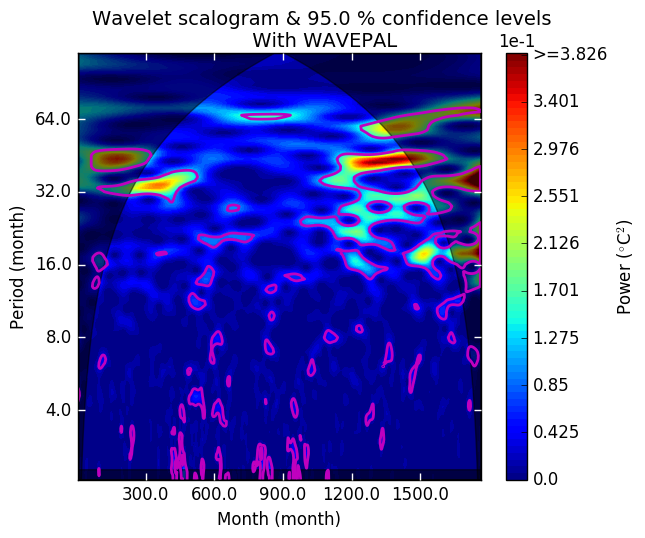

In [10]:
plot_scalogram=x.plot_scalogram(linewidth_cl=2,with_global_scalogram=False,time_string=time_string)
plot_scalogram.suptitle('Wavelet scalogram & 95.0 % confidence levels\n With WAVEPAL',fontsize=14)
fig = plt.gcf() 
fig.set_size_inches(6.5,5.5)
plot_scalogram.savefig(mypath+"wavepal_scal.pdf")
plot_scalogram.show()

In [11]:
os.chdir('../CWT_regularly_sampled')
from CWT_classical import CWT_Morlet_regularly_sampled

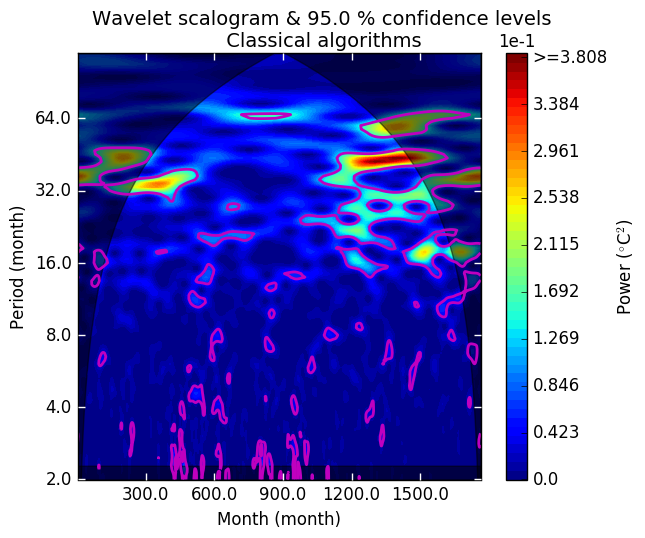

In [12]:
myplot=CWT_Morlet_regularly_sampled(t,y,alpha_rn=alpha_rn,sigma_wn=sig_wn,linewidth_cl=2,w0=w0,t_axis_label="Month", t_units="month", mydata_axis_label="Temp. anomaly", mydata_units="${}^{\circ}$C",time_string=time_string)
myplot.suptitle('Wavelet scalogram & 95.0 % confidence levels\n Classical algorithms',fontsize=14)
fig = plt.gcf() 
fig.set_size_inches(6.5,5.5)
myplot.savefig(mypath+"CWTclassical_scal.pdf")
myplot.show()

In [13]:
os.chdir('../comparaison_wavepal_vs_classique_regularly_sampled')